In [97]:
import pandas as pd
pd.set_option('display.max_columns', None)  
import seaborn as sns

In [98]:
# Set the style
sns.set_style("whitegrid")

# A. Import data

In [99]:
# Dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

In [100]:
# variable information 
print(aids_clinical_trials_group_study_175.variables) 

       name     role        type         demographic  \
0    pidnum       ID     Integer                None   
1       cid   Target      Binary                None   
2      time  Feature     Integer                None   
3       trt  Feature     Integer                None   
4       age  Feature     Integer                 Age   
5      wtkg  Feature  Continuous                None   
6      hemo  Feature      Binary                None   
7      homo  Feature      Binary  Sexual Orientation   
8     drugs  Feature      Binary                None   
9    karnof  Feature     Integer                None   
10   oprior  Feature      Binary                None   
11      z30  Feature      Binary                None   
12   zprior  Feature      Binary                None   
13  preanti  Feature     Integer                None   
14     race  Feature     Integer                Race   
15   gender  Feature      Binary              Gender   
16     str2  Feature      Binary                

In [101]:
# check missing values
X.isnull().sum()

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

In [102]:
# check missing values
y.isnull().sum()

cid    0
dtype: int64

In [103]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782


In [104]:
y.head()

,cid
0,0
1,1
2,0
3,0
4,0


# B. Exploratory data analysis ###

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

### Summary statistics and plots

In [106]:
X.loc[:,"karnof_100"] = X.loc[:,"karnof"].apply(lambda x: 1 if x == 100 else 0)
X.loc[:,"preanti_mth"] = X.loc[:,"preanti"].apply(lambda x: x/30) #in months

/opt/anaconda3/envs/bio275_project/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [107]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,karnof_100,preanti_mth
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,1,0.000000
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564,0,29.833333
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0,23.566667
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,1,46.633333
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,1,45.066667


In [108]:
X.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,karnof_100,preanti_mth
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.0,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,1.0,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.590463,12.639193
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,0.0,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.491863,15.621918
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,1.0,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,1.000000,4.733333
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,1.0,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,1.000000,24.650000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.0,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000,95.033333


In [109]:
X_count = X.groupby(["str2"]).agg({"trt":["count"]})
X_count.columns = ["count"]
X_count["%"] = X_count['count'].divide(X_count['count'].sum())
X_count.loc['Total']= X_count.sum(numeric_only=True, axis=0)

X_count = pd.melt(X_count.reset_index(), 
                  id_vars=["str2"], var_name="Statistics", value_name="Values")
X_count = X_count.rename(columns={"str2":"Group"})
# rename existing indices
# X_count.index = X_count.index.set_names(["Group"])
X_count["Feature"] = "N"
# X_count = X_count.set_index(["Feature","Statistics"], append=True)
# X_count = X_count.reorder_levels(["Feature","Statistics","Group"])
X_count = X_count.set_index(["Feature","Statistics","Group"]).sort_index()
X_count

Values
Feature Statistics Group             
N       %          0         0.414212
                   1         0.585788
                   Total     1.000000
        count      0       886.000000
                   1      1253.000000
                   Total  2139.000000

In [110]:
# lower Percentile
def Q25(x):
    return x.quantile(0.25)

# upper Percentile
def Q75(x):
    return x.quantile(0.75)

In [111]:
X_agg = X.agg({"gender":["sum","mean"],
       "age":["mean", "std"],
       "race":["sum","mean"],
       "homo":["sum","mean"],
       "drugs":["sum","mean"],
       "hemo":["sum","mean"],
       "karnof_100":["sum","mean"],
       "symptom":["sum","mean"],
       "cd40":["mean","std"],
       "cd420":["mean","std"],
       "preanti_mth":["median",Q25,Q75],
      }).unstack().dropna().to_frame()

# rename column
X_agg.columns = ["Values"]

# Set 3 level index
# rename existing indices
X_agg.index = X_agg.index.set_names(["Feature", "Statistics"])
# further add one index (Group)
X_agg["Group"] = "Total"
X_agg = X_agg.set_index('Group', append=True)
X_agg

Values
Feature     Statistics Group             
gender      sum        Total  1771.000000
            mean       Total     0.827957
age         mean       Total    35.248247
            std        Total     8.709026
race        sum        Total   617.000000
            mean       Total     0.288453
homo        sum        Total  1414.000000
            mean       Total     0.661057
drugs       sum        Total   281.000000
            mean       Total     0.131370
hemo        sum        Total   180.000000
            mean       Total     0.084151
karnof_100  sum        Total  1263.000000
            mean       Total     0.590463
symptom     sum        Total   370.000000
            mean       Total     0.172978
cd40        mean       Total   350.501169
            std        Total   118.573863
cd420       mean       Total   371.307153
            std        Total   144.634909
preanti_mth median     Total     4.733333
            Q25        Total     0.000000
            Q75        Total    24.650000

In [112]:
X_grouped_agg = X.groupby("str2").agg({"gender":["sum","mean"],
                       "age":["mean", "std"],
                       "race":["sum","mean"],
                       "homo":["sum","mean"],
                       "drugs":["sum","mean"],
                       "hemo":["sum","mean"],
                       "karnof_100":["sum","mean"],
                       "symptom":["sum","mean"],
                       "cd40":["mean","std"],
                       "cd420":["mean","std"],
                        "preanti_mth":["median",Q25,Q75],
                      }).unstack().to_frame()
# rename
X_grouped_agg.columns = ["Values"]
# Set 3 level index
X_grouped_agg.index = X_grouped_agg.index.set_names(["Feature", "Statistics",'Group'])
X_grouped_agg

Values
Feature     Statistics Group             
gender      sum        0       746.000000
                       1      1025.000000
            mean       0         0.841986
                       1         0.818037
age         mean       0        34.541761
                       1        35.747805
            std        0         8.576143
                       1         8.770881
race        sum        0       294.000000
                       1       323.000000
            mean       0         0.331828
                       1         0.257781
homo        sum        0       604.000000
                       1       810.000000
            mean       0         0.681716
                       1         0.646449
drugs       sum        0       116.000000
                       1       165.000000
            mean       0         0.130926
                       1         0.131684
hemo        sum        0        38.000000
                       1       142.000000
            mean       0         0.042889
                       1         0.113328
karnof_100  sum        0       561.000000
                       1       702.000000
            mean       0         0.633183
                       1         0.560255
symptom     sum        0       141.000000
                       1       229.000000
            mean       0         0.159142
                       1         0.182761
cd40        mean       0       368.062077
                       1       338.083799
            std        0       121.591237
                       1       114.831166
cd420       mean       0       408.529345
                       1       344.987231
            std        0       143.109356
                       1       139.901751
preanti_mth median     0         0.000000
                       1        20.866667
            Q25        0         0.000000
                       1         9.000000
            Q75        0         0.000000
                       1        30.866667

In [113]:
# combine statistics of grouped with total
X_agg_combined = pd.concat([X_count, X_grouped_agg, X_agg]).sort_index(level=["Feature", "Statistics"]).reset_index()
X_agg_combined.loc[:,"Statistics"] = X_agg_combined.apply(lambda row: "count" if row["Statistics"]=="sum" and row["Feature"] in ["gender","race","homo","drugs","hemo","karnof_100","symptom"] else row["Statistics"], axis=1)
X_agg_combined.loc[:,"Statistics"] = X_agg_combined.apply(lambda row: "%" if row["Statistics"]=="mean" and row["Feature"] in ["gender","race","homo","drugs","hemo","karnof_100","symptom"] else row["Statistics"], axis=1)
X_agg_combined.loc[:,"Statistics"] = X_agg_combined.loc[:,"Statistics"].apply(lambda x: "s.d." if x == "std" else x)

# custom sort index
feature_sort_list = ["N","gender","age","race","homo","drugs","hemo","karnof_100","symptom","cd40","cd420","preanti_mth"]
feature_cat = pd.Categorical(X_agg_combined["Feature"], 
                   categories=feature_sort_list, 
                   ordered=True)
X_agg_combined['Feature'] = feature_cat
X_agg_combined = X_agg_combined.set_index(["Feature", "Statistics","Group"]).sort_index(level=["Feature", "Statistics"])

# pivot Group to columns
X_agg_combined = X_agg_combined.unstack("Group")
# rename columns
X_agg_combined.columns = X_agg_combined.columns.get_level_values("Group")
X_agg_combined.columns = ['Without antiretroviral history','With antiretroviral history','Total']
# rename row indices
X_agg_combined.rename(index={'gender': 'Male sex',
                             'age': 'Age',
                             'race': 'Non-white race',
                             'homo': 'Homosexuality',
                             'drugs': 'Injection-drug use',
                             'hemo': 'Hemophilia',
                             'karnof_100': 'Karnofsky score of 100',
                             'symptom': 'Symptomatic HIV infection',
                             'cd40': 'CD4 cell count (baseline)',
                             'cd420': 'CD4 cell count (20+/-5 weeks)',
                             'preanti_mth': 'Length of prior antiretroviral therapy',
                            }, 
                      inplace=True)
X_agg_combined

Without antiretroviral history  \
Feature                                Statistics                                   
N                                      %                                 0.414212   
                                       count                           886.000000   
Male sex                               %                                 0.841986   
                                       count                           746.000000   
Age                                    mean                             34.541761   
                                       s.d.                              8.576143   
Non-white race                         %                                 0.331828   
                                       count                           294.000000   
Homosexuality                          %                                 0.681716   
                                       count                           604.000000   
Injection-drug use                     %                                 0.130926   
                                       count                           116.000000   
Hemophilia                             %                                 0.042889   
                                       count                            38.000000   
Karnofsky score of 100                 %                                 0.633183   
                                       count                           561.000000   
Symptomatic HIV infection              %                                 0.159142   
                                       count                           141.000000   
CD4 cell count (baseline)              mean                            368.062077   
                                       s.d.                            121.591237   
CD4 cell count (20+/-5 weeks)          mean                            408.529345   
                                       s.d.                            143.109356   
Length of prior antiretroviral therapy Q25                               0.000000   
                                       Q75                               0.000000   
                                       median                            0.000000   

                                                   With antiretroviral history  \
Feature                                Statistics                                
N                                      %                              0.585788   
                                       count                       1253.000000   
Male sex                               %                              0.818037   
                                       count                       1025.000000   
Age                                    mean                          35.747805   
                                       s.d.                           8.770881   
Non-white race                         %                              0.257781   
                                       count                        323.000000   
Homosexuality                          %                              0.646449   
                                       count                        810.000000   
Injection-drug use                     %                              0.131684   
                                       count                        165.000000   
Hemophilia                             %                              0.113328   
                                       count                        142.000000   
Karnofsky score of 100                 %                              0.560255   
                                       count                        702.000000   
Symptomatic HIV infection              %                              0.182761   
                                       count                        229.000000   
CD4 cell count (baseline)              mean                         338.083799   
                                 

In [114]:
X_agg_combined.to_excel("/Users/heinamchan/Documents/GitHub/bio275/Project/result/1_Summary statistics.xlsx")

In [115]:
def plot_group_mean(group, col_list, criteria=None, ax=None):
    if isinstance(criteria,pd.Series):
        X_filtered = X.loc[criteria]
    else:
        X_filtered = X.copy()
    X_required = X_filtered[[group]+col_list]
    X_required_mean = X_required.groupby(group).mean()
    
    if ax == None:
        return X_required_mean.plot.bar()
    else:
        return X_required_mean.plot.bar(ax=ax)

def plot_group_box(group, col_list, criteria=None, ax=None):
    if isinstance(criteria,pd.Series):
        X_filtered = X.loc[criteria]
    else:
        X_filtered = X.copy()
    X_required = X_filtered[[group]+col_list]
    
    if ax == None:
        return X_required.boxplot(by=group)
    else:
        return X_required.boxplot(by=group, ax=ax)

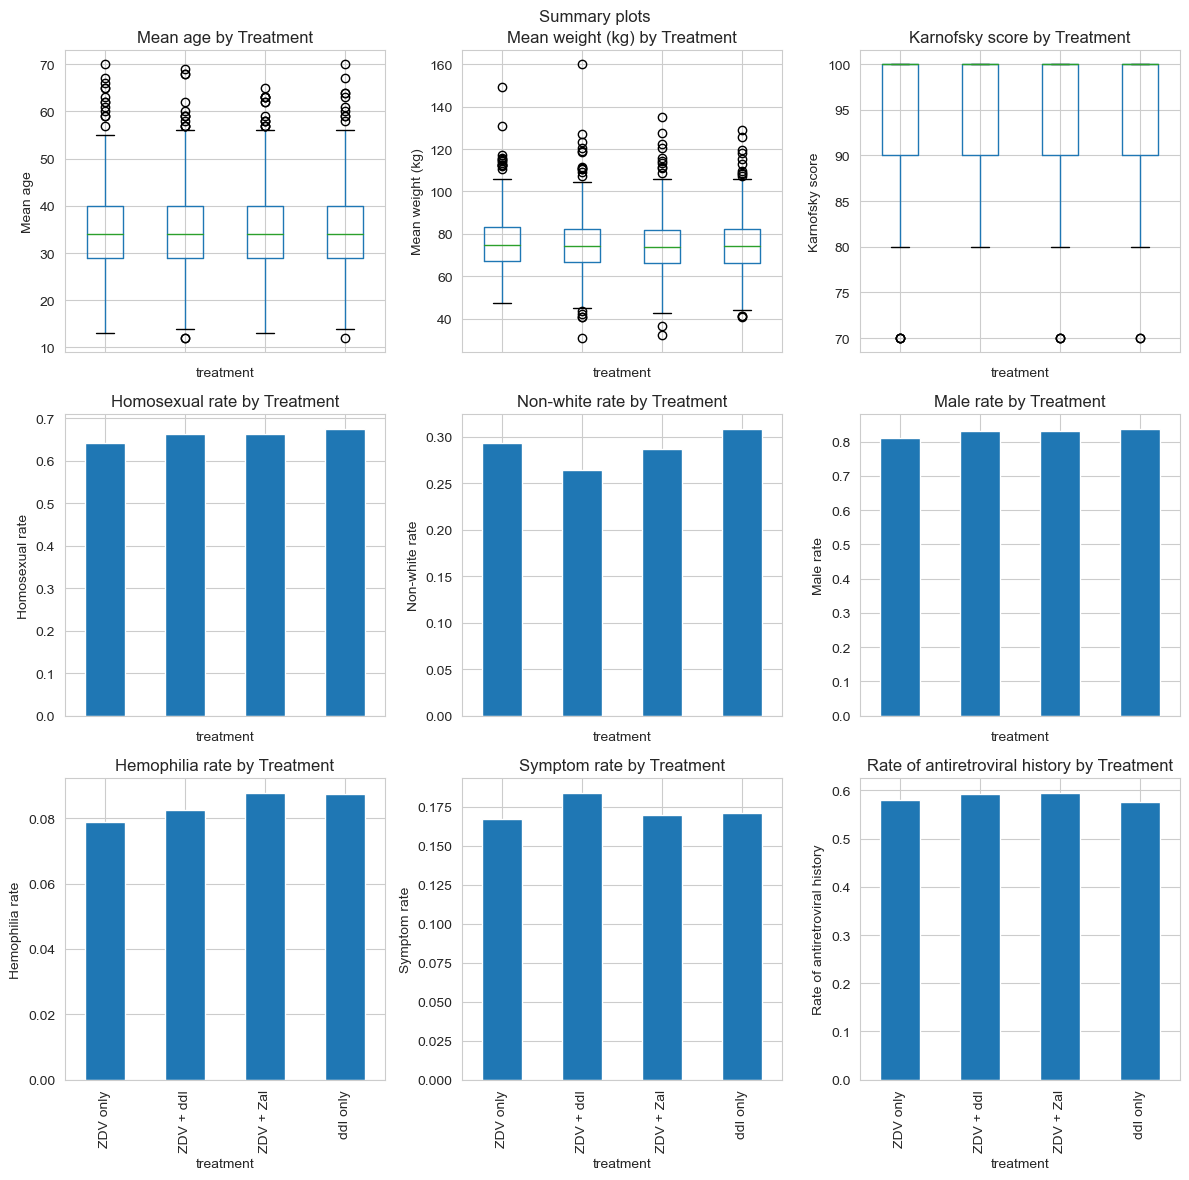

In [116]:
# Plot background info / demographics by treatment
fig, axes = plt.subplots(3,3,figsize=(12,12))

# ============= Row 1 ================
# side by side box plot of Mean age, by treatment
ax = plot_group_box(group="trt", col_list=["age"], ax=axes[0][0])

ax.set_title("Mean age by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Mean age")
_=ax.set_xticklabels(["","","",""])

# side by side box plot of Mean weight (kg), by treatment
ax = plot_group_box(group="trt", col_list=["wtkg"], ax=axes[0][1])

ax.set_title("Mean weight (kg) by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Mean weight (kg)")
_=ax.set_xticklabels(["","","",""])

# side by side bar plot of Karnofsky score, by treatment
ax = plot_group_box(group="trt", col_list=["karnof"], ax=axes[0][2])

ax.set_title("Karnofsky score by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Karnofsky score")
_=ax.set_xticklabels(["","","",""])

# ============= Row 2 ================
# side by side bar plot of Homosexual rate, by treatment
ax = plot_group_mean(group="trt", col_list=["homo"], ax=axes[1][0])

ax.set_title("Homosexual rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Homosexual rate")
_=ax.set_xticklabels(["","","",""])
ax.get_legend().remove()

# side by side bar plot of Non-white rate, by treatment
ax = plot_group_mean(group="trt", col_list=["race"], ax=axes[1][1])

ax.set_title("Non-white rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Non-white rate")
_=ax.set_xticklabels(["","","",""])
ax.get_legend().remove()

# side by side bar plot of Male rate, by treatment
ax = plot_group_mean(group="trt", col_list=["gender"], ax=axes[1][2])

ax.set_title("Male rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Male rate")
_=ax.set_xticklabels(["","","",""])
ax.get_legend().remove()

# ============= Row 3 ================
# side by side bar plot of hemophilia rate, by treatment
ax = plot_group_mean(group="trt", col_list=["hemo"], ax=axes[2][0])

ax.set_title("Hemophilia rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Hemophilia rate")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

# side by side bar plot of symptom rate, by treatment
ax = plot_group_mean(group="trt", col_list=["symptom"], ax=axes[2][1])

ax.set_title("Symptom rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Symptom rate")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

# side by side bar plot of antiretroviral history rate, by treatment
ax = plot_group_mean(group="trt", col_list=["str2"], ax=axes[2][2])

ax.set_title("Rate of antiretroviral history by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Rate of antiretroviral history")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

# other settings
fig.suptitle("Summary plots")
plt.tight_layout()

## CD4 plots ##

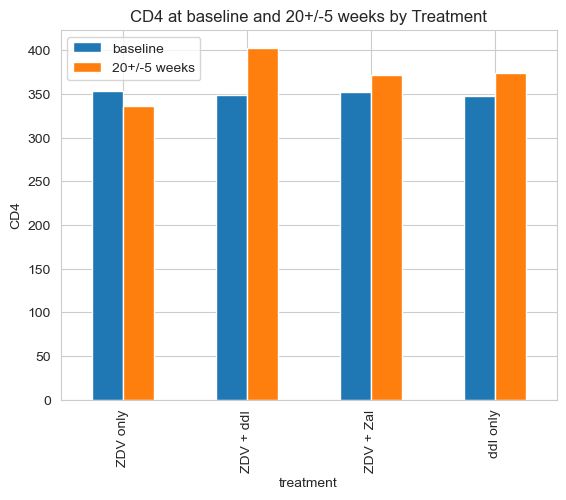

In [117]:
# side by side bar plot of CD4, by treatment
ax = plot_group_mean(group="trt", col_list=["cd40","cd420"])

ax.set_title("CD4 at baseline and 20+/-5 weeks by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("CD4")
ax.legend(["baseline","20+/-5 weeks"])
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])

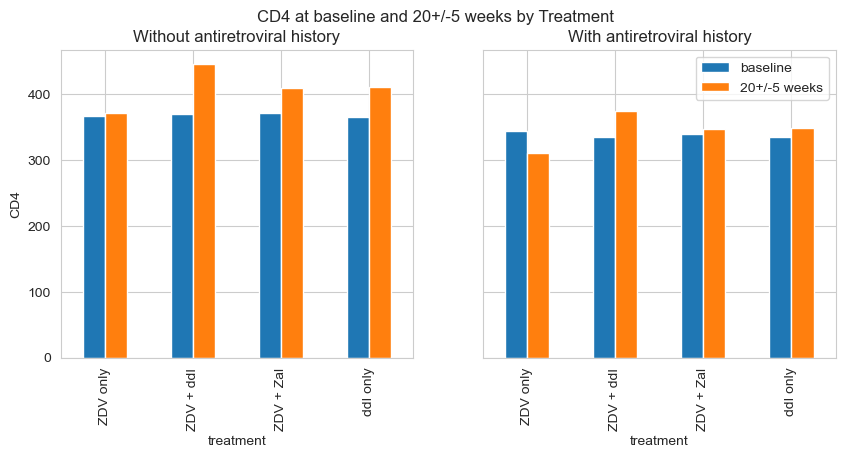

In [118]:
# side by side bar plot of CD4, by treatment & antiretroviral history
fig, axes = plt.subplots(1,2,figsize=(10,4),sharey=True)
fig.suptitle("CD4 at baseline and 20+/-5 weeks by Treatment")

ax = plot_group_mean(group="trt", col_list=["cd40","cd420"], criteria=X["str2"]==0, ax=axes[0])
ax.set_title("Without antiretroviral history")
ax.set_xlabel("treatment")
ax.set_ylabel("CD4")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

ax = plot_group_mean(group="trt", col_list=["cd40","cd420"], criteria=X["str2"]==1, ax=axes[1])
ax.set_title("With antiretroviral history")
ax.set_xlabel("treatment")
ax.set_ylabel("CD4")
ax.legend(["baseline","20+/-5 weeks"])
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])

## CD8 plots (not so relevant) 

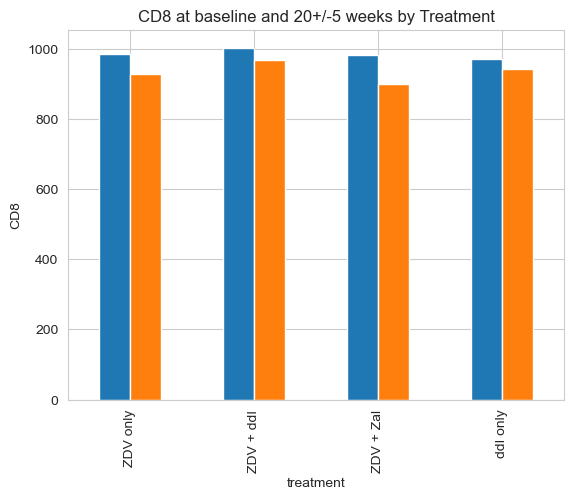

In [119]:
# side by side bar plot of CD8, by treatment
ax = plot_group_mean(group="trt", col_list=["cd80","cd820"])

ax.set_title("CD8 at baseline and 20+/-5 weeks by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("CD8")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

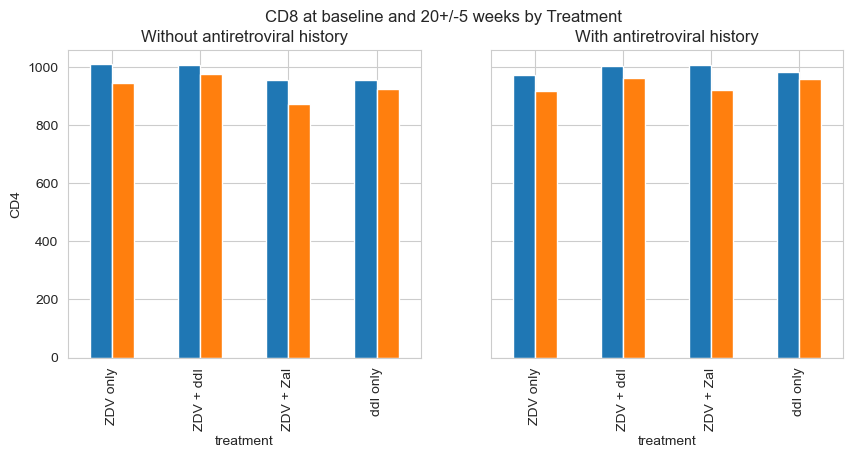

In [120]:
# side by side bar plot of CD8, by treatment & antiretroviral history
fig, axes = plt.subplots(1,2,figsize=(10,4),sharey=True)
fig.suptitle("CD8 at baseline and 20+/-5 weeks by Treatment")

ax = plot_group_mean(group="trt", col_list=["cd80","cd820"], criteria=X["str2"]==0, ax=axes[0])
ax.set_title("Without antiretroviral history")
ax.set_xlabel("treatment")
ax.set_ylabel("CD4")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

ax = plot_group_mean(group="trt", col_list=["cd80","cd820"], criteria=X["str2"]==1, ax=axes[1])
ax.set_title("With antiretroviral history")
ax.set_xlabel("treatment")
ax.set_ylabel("CD4")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

## Failure rate plots

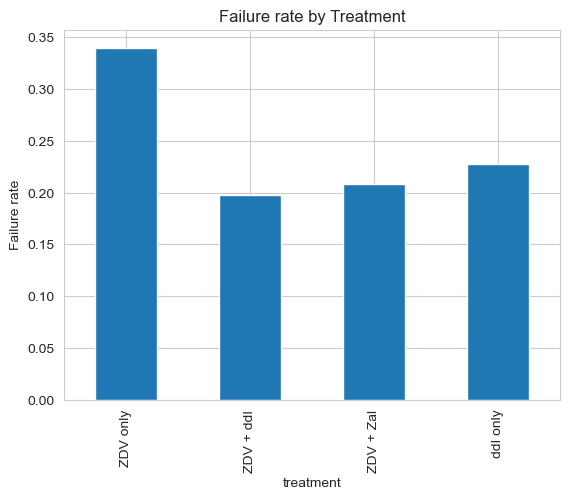

In [121]:
# side by side bar plot of failure rate, by treatment

X_failure = pd.concat([X["trt"], y], axis=1)
X_failure_mean = X_failure.groupby("trt").mean()

ax = X_failure_mean.plot.bar()

ax.set_title("Failure rate by Treatment")
ax.set_xlabel("treatment")
ax.set_ylabel("Failure rate")
_=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
ax.get_legend().remove()

In [122]:
X_failure_mean

,cid
trt,
0,0.340226
1,0.197318
2,0.208015
3,0.228164


In [130]:
X_failure_mean.to_excel("/Users/heinamchan/Documents/GitHub/bio275/Project/result/1_Failure statistics.xlsx")

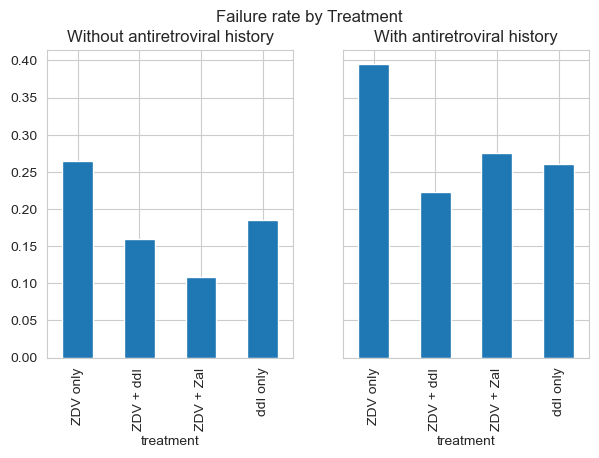

In [123]:
# side by side bar plot of failure rate, by treatment & antiretroviral history
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle("Failure rate by Treatment")

criteria_col = "str2"
value_list = [0,1]
title_list = ["Without antiretroviral history","With antiretroviral history"]

for idx, curr_criteria in enumerate(value_list):
    X_failure = pd.concat([X.loc[X[criteria_col]==curr_criteria,"trt"], y.loc[X[criteria_col]==curr_criteria]], axis=1)
    X_failure_mean = X_failure.groupby("trt").mean()
    ax = X_failure_mean.plot.bar(ax=axes[idx])
    ax.set_title(title_list[idx])
    _=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
    ax.set_xlabel("treatment")
    ax.get_legend().remove()

    

In [124]:
X_failure_str2 = pd.concat([X[["str2","trt"]], y], axis=1)
X_failure_str2_mean = X_failure_str2.groupby(["str2","trt"]).mean()
X_failure_str2_mean

cid
str2 trt          
0    0    0.264574
     1    0.159624
     2    0.108491
     3    0.184874
1    0    0.394822
     1    0.223301
     2    0.275641
     3    0.260062

In [131]:
X_failure_str2_mean.to_excel("/Users/heinamchan/Documents/GitHub/bio275/Project/result/1_Failure by history statistics.xlsx")

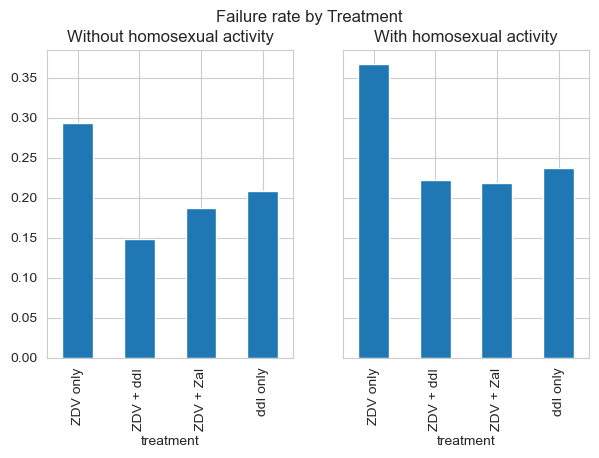

In [125]:
# side by side bar plot of failure rate, by treatment & homo
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle("Failure rate by Treatment")

criteria_col = "homo"
value_list = [0,1]
title_list = ["Without homosexual activity","With homosexual activity"]
for idx, curr_criteria in enumerate(value_list):
    X_failure = pd.concat([X.loc[X[criteria_col]==curr_criteria,"trt"], y.loc[X[criteria_col]==curr_criteria]], axis=1)
    X_failure_mean = X_failure.groupby("trt").mean()
    ax = X_failure_mean.plot.bar(ax=axes[idx])
    ax.set_title(title_list[idx])
    _=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
    ax.set_xlabel("treatment")
    ax.get_legend().remove()


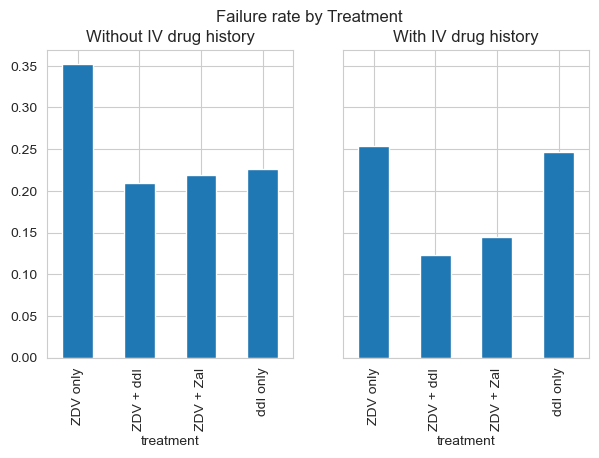

In [126]:
# side by side bar plot of failure rate, by treatment & previous IV drug history
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle("Failure rate by Treatment")

criteria_col = "drugs"
value_list = [0,1]
title_list = ["Without IV drug history","With IV drug history"]
for idx, curr_criteria in enumerate(value_list):
    X_failure = pd.concat([X.loc[X[criteria_col]==curr_criteria,"trt"], y.loc[X[criteria_col]==curr_criteria]], axis=1)
    X_failure_mean = X_failure.groupby("trt").mean()
    ax = X_failure_mean.plot.bar(ax=axes[idx])
    ax.set_title(title_list[idx])
    _=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
    ax.set_xlabel("treatment")
    ax.get_legend().remove()


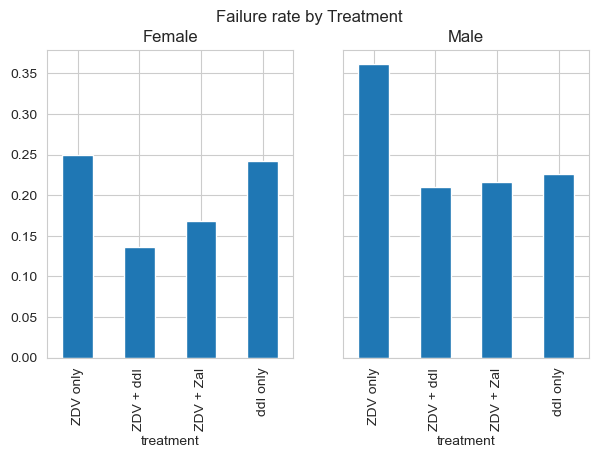

In [127]:
# side by side bar plot of failure rate, by treatment & gender
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle("Failure rate by Treatment")

criteria_col = "gender"
value_list = [0,1]
title_list = ["Female","Male"]
for idx, curr_criteria in enumerate(value_list):
    X_failure = pd.concat([X.loc[X[criteria_col]==curr_criteria,"trt"], y.loc[X[criteria_col]==curr_criteria]], axis=1)
    X_failure_mean = X_failure.groupby("trt").mean()
    ax = X_failure_mean.plot.bar(ax=axes[idx])
    ax.set_title(title_list[idx])
    _=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
    ax.set_xlabel("treatment")
    ax.get_legend().remove()


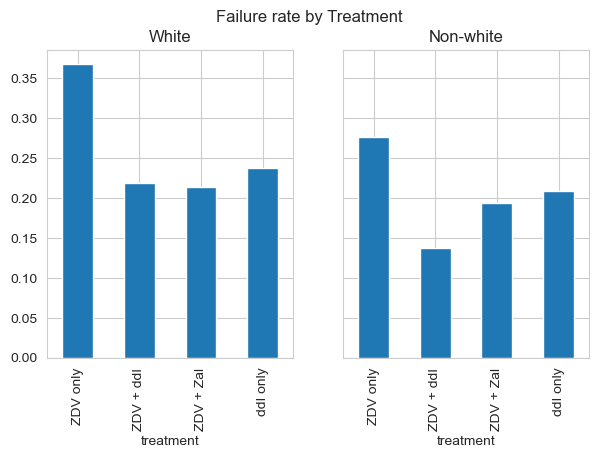

In [128]:
# side by side bar plot of failure rate, by treatment & race
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle("Failure rate by Treatment")

criteria_col = "race"
value_list = [0,1]
title_list = ["White","Non-white"]
for idx, curr_criteria in enumerate(value_list):
    X_failure = pd.concat([X.loc[X[criteria_col]==curr_criteria,"trt"], y.loc[X[criteria_col]==curr_criteria]], axis=1)
    X_failure_mean = X_failure.groupby("trt").mean()
    ax = X_failure_mean.plot.bar(ax=axes[idx])
    ax.set_title(title_list[idx])
    _=ax.set_xticklabels(["ZDV only","ZDV + ddI","ZDV + Zal", "ddI only"])
    ax.set_xlabel("treatment")
    ax.get_legend().remove()


## Time to failure

Text(0.5, 0, 'Weight (kg)')

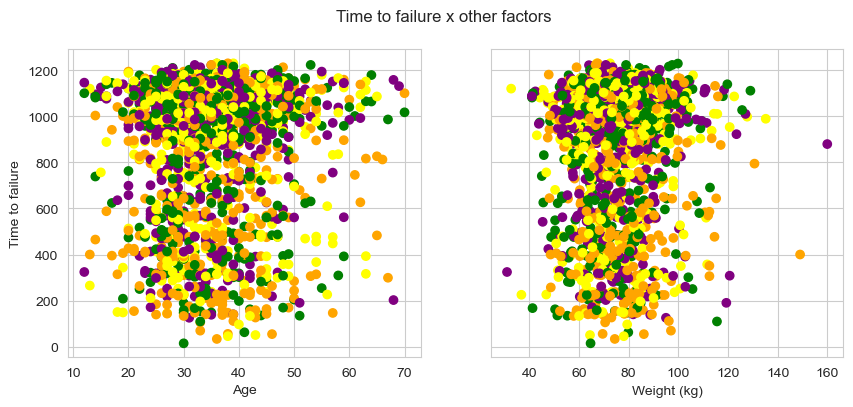

In [129]:
# side by side scatter plot of time to failure
fig, axes = plt.subplots(1,2,figsize=(10,4), sharey=True)
fig.suptitle("Time to failure x other factors")

colors = {0: 'orange', 1: 'purple', 2:'yellow', 3:"green"}
color_list = [colors[group] for group in X['trt']]

axes[0].scatter(X["age"], X["time"], c=color_list)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Time to failure")
axes[1].scatter(X["wtkg"], X["time"], c=color_list)
axes[1].set_xlabel("Weight (kg)")
